In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import glob
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
train_benign_df = pd.read_csv("./csv_files/train_benign_asmfile.txt")
train_benign_df.drop(train_benign_df.columns[-1], axis=1, inplace=True)
train_benign_df.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
train_benign_df['label'] = 0

train_malware_df = pd.read_csv("./csv_files/train_malware_asmfile.txt")
train_malware_df.drop(train_malware_df.columns[-1], axis=1, inplace=True)
train_malware_df.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
train_malware_df['label'] = 1

test_benign_df = pd.read_csv("./csv_files/test_benign_asmfile.txt")
test_benign_df.drop(test_benign_df.columns[-1], axis=1, inplace=True)
test_benign_df.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
test_benign_df['label'] = 0

test_malware_df = pd.read_csv("./csv_files/test_malware_asmfile.txt")
test_malware_df.drop(test_malware_df.columns[-1], axis=1, inplace=True)
test_malware_df.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
test_malware_df['label'] = 1

valid_benign = pd.read_csv("./csv_files/valid_benign_asmfile.txt")
valid_benign.drop(valid_benign.columns[-1], axis=1, inplace=True)
valid_benign.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
valid_benign['label'] = 0

valid_malware = pd.read_csv("./csv_files/valid_malware_asmfile.txt")
valid_malware.drop(valid_malware.columns[-1], axis=1, inplace=True)
valid_malware.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
valid_malware['label'] = 1


In [3]:
import sklearn
df_list = [train_benign_df, train_malware_df, test_benign_df, test_malware_df, valid_benign, valid_malware]
full_df = pd.concat(df_list, ignore_index=True, axis=0)
full_shuffled_df = sklearn.utils.shuffle(full_df)
full_shuffled_df

,ID,jmp,mov,retf,push,pop,xor,retn,nop,sub,...,ebx,ecx,edi,ebp,esp,eip,.dll,std::,:dword,label
430,4d32d0d8c45770c782d3a498d84ae400,124,731,0,489,105,26,80,0,9,...,0,0,0,0,0,0,0,24,0,0
1818,3ed32a42ab921ec47016f7e30265fc73,767,6389,0,6636,1490,455,911,0,371,...,0,0,0,0,0,0,0,2,0,1
1470,3e9a58f2462e284e54a47aaadd4f5a1f,2291,2370,28,351,367,2098,176,13,833,...,0,0,0,0,0,0,0,0,9,1
2245,5ca54eb00253e3a52da5975fb6ac6114,1713,31512,93,8348,2258,4668,1052,178,1195,...,0,0,0,0,0,0,0,82,1025,1
2369,5baba47d0602b4fad1222fbec2f05d9d,396,7691,0,4515,1484,601,632,0,390,...,0,0,0,0,0,0,4,54,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,3ec3dd1712ce8299f853fee4ed7d6ac5,2002,20304,0,11457,3740,1194,1709,5,841,...,0,0,0,10,0,0,2,1015,106,0
545,2afc76472e312d39f0e6a66207e7170a,1269,7645,0,5600,1591,794,1194,0,233,...,0,0,0,0,0,0,4,723,0,0
138,4d30803446c5f47fcf740350287ad379,33,353,0,214,46,20,28,0,14,...,0,0,0,0,0,0,0,1,0,0
427,12b29ce5203c0fb73c7a32ddc03e66d5,169,1585,0,1290,195,62,222,0,36,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
NORMALIZE_VALID_COLUMNS = [ 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword']

df = full_shuffled_df[NORMALIZE_VALID_COLUMNS]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[NORMALIZE_VALID_COLUMNS],full_shuffled_df['label'], stratify=full_shuffled_df['label'], test_size=0.2, random_state=42)

In [6]:
# from sklearn.decomposition import PCA

# skpca = PCA(n_components=30)
# X_pca = skpca.fit_transform(X_train)
# print('Variance sum : ', skpca.explained_variance_ratio_.cumsum()[-1])

#### RandomForestClassifier

In [7]:
features = full_shuffled_df[NORMALIZE_VALID_COLUMNS]
label = full_shuffled_df['label']

In [9]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix

model = RFC(n_estimators=100, random_state=42, 
                          oob_score = True,
                          max_depth = 16, 
                          max_features = 'sqrt')

model.fit(X_train, y_train)

# X_test_scaled = scaler.transform(X_test)
# X_test_new = pd.DataFrame(X_test_scaled, columns=features.columns)
# X_test_pca = skpca.transform(X_test_new)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9048    0.9500    0.9268       280
           1     0.9472    0.8996    0.9228       279

    accuracy                         0.9249       559
   macro avg     0.9260    0.9248    0.9248       559
weighted avg     0.9259    0.9249    0.9248       559



In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
params = { 'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80],
           'max_depth' : [10, 12, 14, 16, 18, 20, 22, 24, 26, 30],
           'min_samples_leaf' : [1, 2, 3, 4],
           'min_samples_split' : [1, 2, 3, 4]
            }

In [12]:
hipher_rf_clf = RandomForestClassifier(random_state=42, max_features = 'sqrt')
grid_cv = GridSearchCV(hipher_rf_clf, params, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도 : {:.4f}'.format(grid_cv.best_score_))


최적 하이퍼 파라미터:  {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 60}
최고 예측 정확도 : 0.9253


In [13]:
rf_best = RFC(n_estimators=60,
              max_depth=14,
              min_samples_leaf=1,
              min_samples_split=3,
              random_state=42,
              oob_score = True,
              n_jobs=-1,
              max_features= 'sqrt')
rf_best.fit(X_train, y_train)

pred = rf_best.predict(X_test)
print(classification_report(y_test,pred, digits=4))

              precision    recall  f1-score   support

           0     0.9051    0.9536    0.9287       280
           1     0.9508    0.8996    0.9245       279

    accuracy                         0.9267       559
   macro avg     0.9279    0.9266    0.9266       559
weighted avg     0.9279    0.9267    0.9266       559



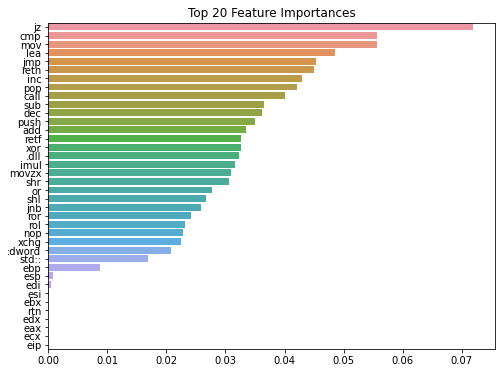

In [14]:
ftr_importances_values = rf_best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()